Analysis of motion, comparing all the beads pictures to the reference using Cv2 and the Optical Flow method.

In [8]:
import cv2
import numpy as np

# Load the two input images
reference = cv2.imread('reference.tif')
beads = [cv2.imread('beads0.tif'), cv2.imread('beads1.tif'), cv2.imread('beads2.tif'), cv2.imread('beads3.tif'),
          cv2.imread('beads4.tif'), cv2.imread('beads5.tif'), cv2.imread('beads6.tif')]

# Convert the images to grayscale
reference_gray = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
beads_gray = []

for i in beads:
    beads_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

In [9]:
# Calculate the optical flow
flow = []
for i in beads_gray:
    flow.append(cv2.calcOpticalFlowFarneback(reference_gray, i, None, 0.5, 5, 13, 3, 5, 1.2, 0))

In [10]:
# Define the step size and scale factor for the vectors
step_size = 16
scale_factor = 8

# Draw the flow vectors on the image
for i in range(0, len(flow)):
    h, w = reference_gray.shape
    output = np.zeros((h, w, 3), dtype=np.uint8)
    output[..., 0] = reference_gray
    output[..., 1] = reference_gray
    output[..., 2] = reference_gray

    for y in range(0, h, step_size):
        for x in range(0, w, step_size):
            dx = int(flow[i][y, x, 0] * scale_factor)
            dy = int(flow[i][y, x, 1] * scale_factor)
            cv2.arrowedLine(output, (x, y), (x + dx, y + dy), (0, 255, 0), 1, cv2.LINE_AA)
            
    #cv2.imshow('Reference', image1)
    #cv2.imshow(f'Beads{i}', image2[0])
    cv2.imshow(f'Optical Flow, Reference x Beads{i}', output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Analysis of motion, comparing all the beads pictures to the reference using the PIV method.

In [11]:
import numpy as np
import openpiv.pyprocess
import openpiv.tools
import matplotlib.pyplot as plt

# Load the two input images
reference = openpiv.tools.imread('reference.tif')
beads = [openpiv.tools.imread('beads0.tif'), openpiv.tools.imread('beads1.tif'), openpiv.tools.imread('beads2.tif'), openpiv.tools.imread('beads3.tif'), openpiv.tools.imread('beads4.tif'),
         openpiv.tools.imread('beads5.tif'), openpiv.tools.imread('beads6.tif')]

In [12]:
# Parameters for the OpenPIV algorithm
window_size = 60
overlap = 40

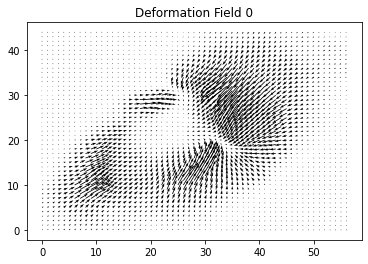

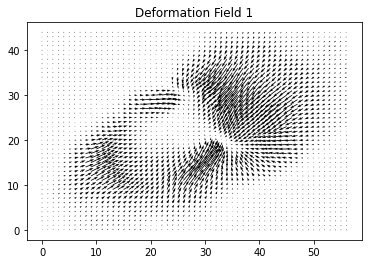

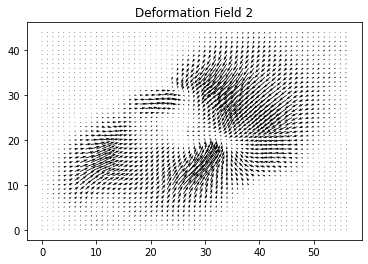

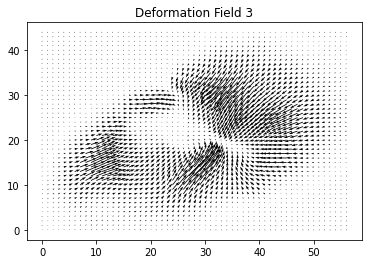

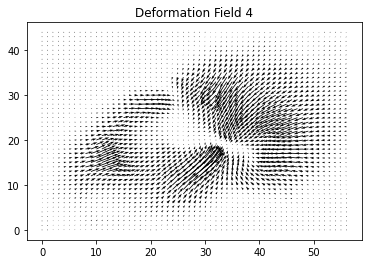

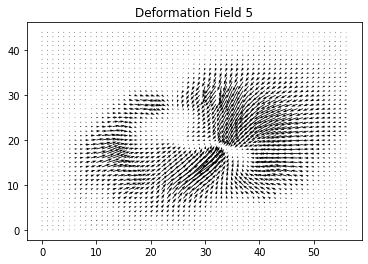

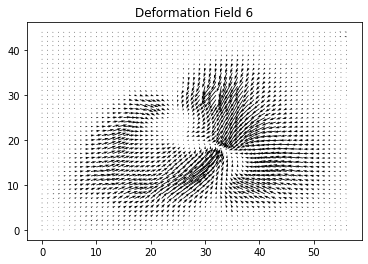

In [13]:
# Calculate deformation field using the pyprocess function
count = 0
for i in beads:
    deformation_field = openpiv.pyprocess.extended_search_area_piv(reference, i, window_size=window_size, overlap=overlap)
    # Extract the displacement components
    u, v = deformation_field[0], deformation_field[1]

    # Create a grid for quiver plot
    y, x = np.mgrid[:u.shape[0], :u.shape[1]]
    fig, ax = plt.subplots()
    ax.quiver(x, y, u, v)
    ax.set_title(f'Deformation Field {count}')
    count += 1
    plt.show()

Analysis of motion, comparing all the beads pictures to the reference using the Elastix method.

In [ ]:
import numpy as np
import itk
import matplotlib.pyplot as plt

# Load the two input images using OpenCV
reference = itk.imread('reference.tif')
beads = [itk.imread('beads0.tif'), itk.imread('beads1.tif'), itk.imread('beads2.tif'), itk.imread('beads3.tif'), itk.imread('beads4.tif'),
         itk.imread('beads5.tif'), itk.imread('beads6.tif')]


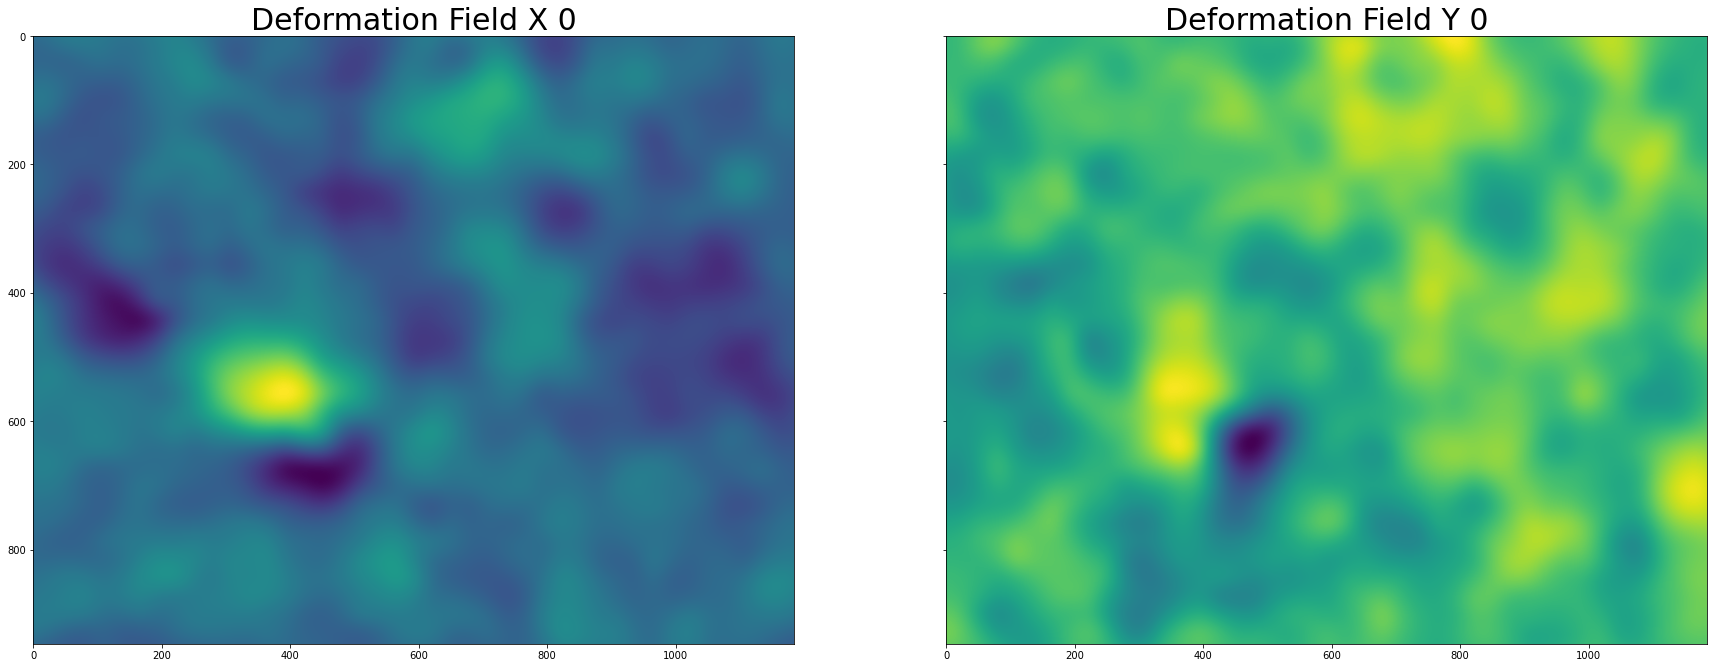

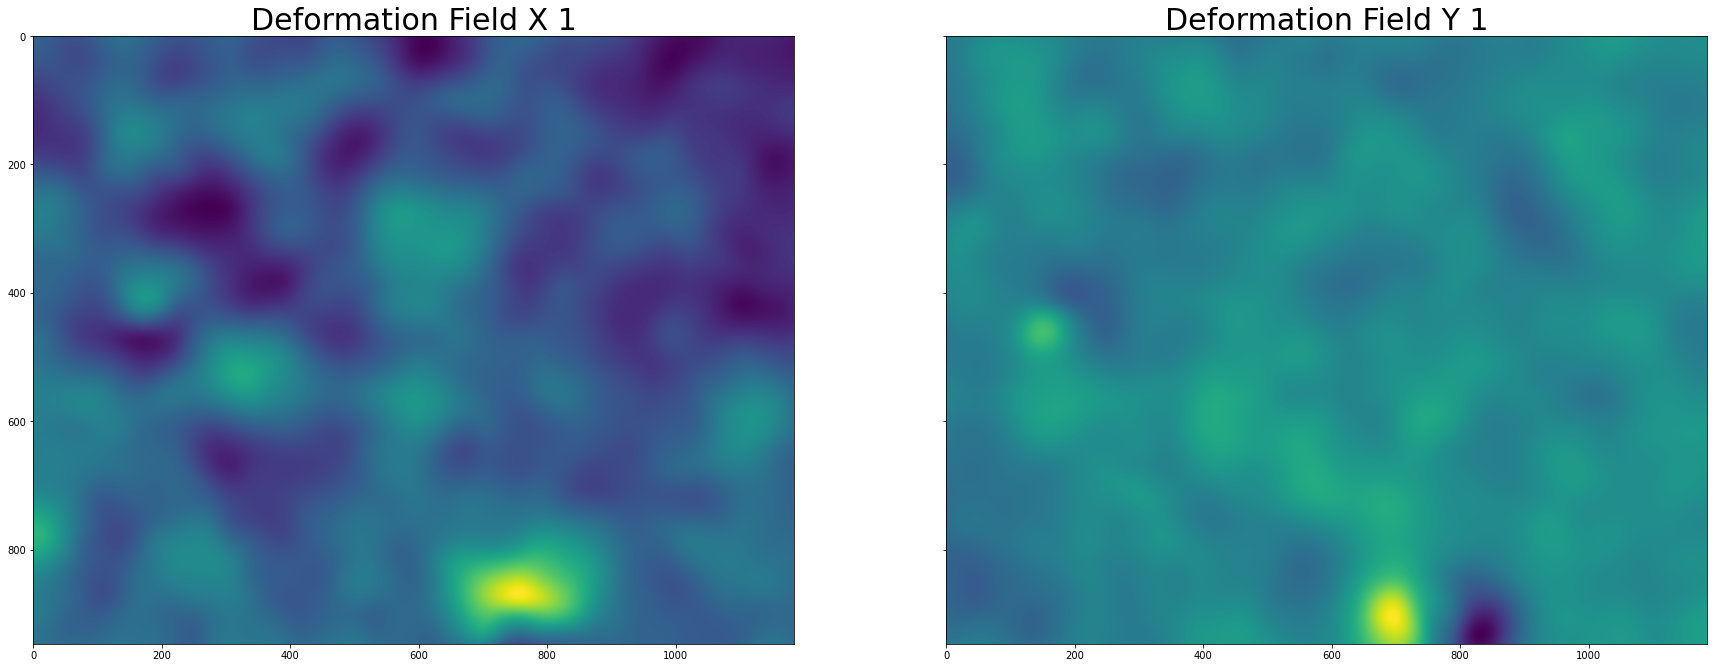

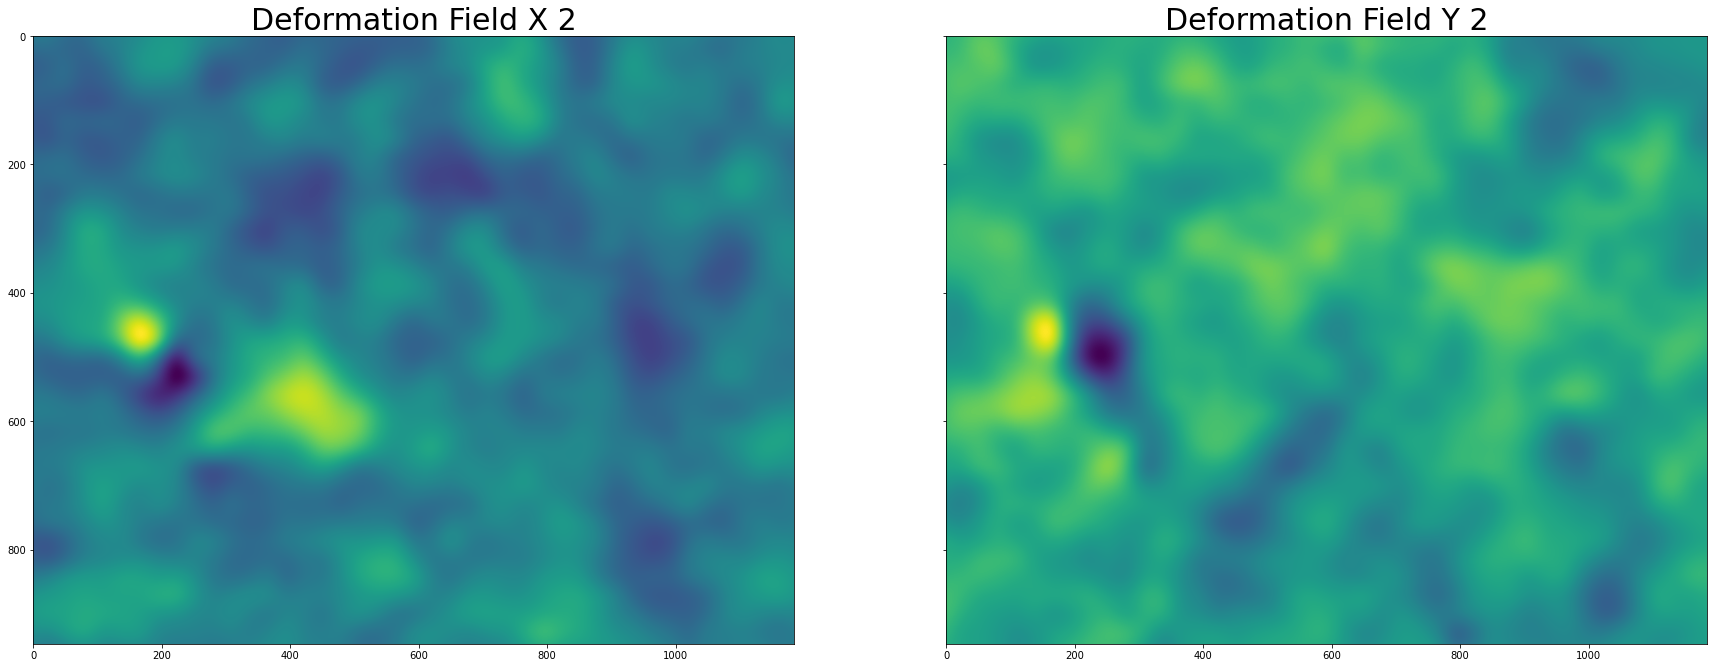

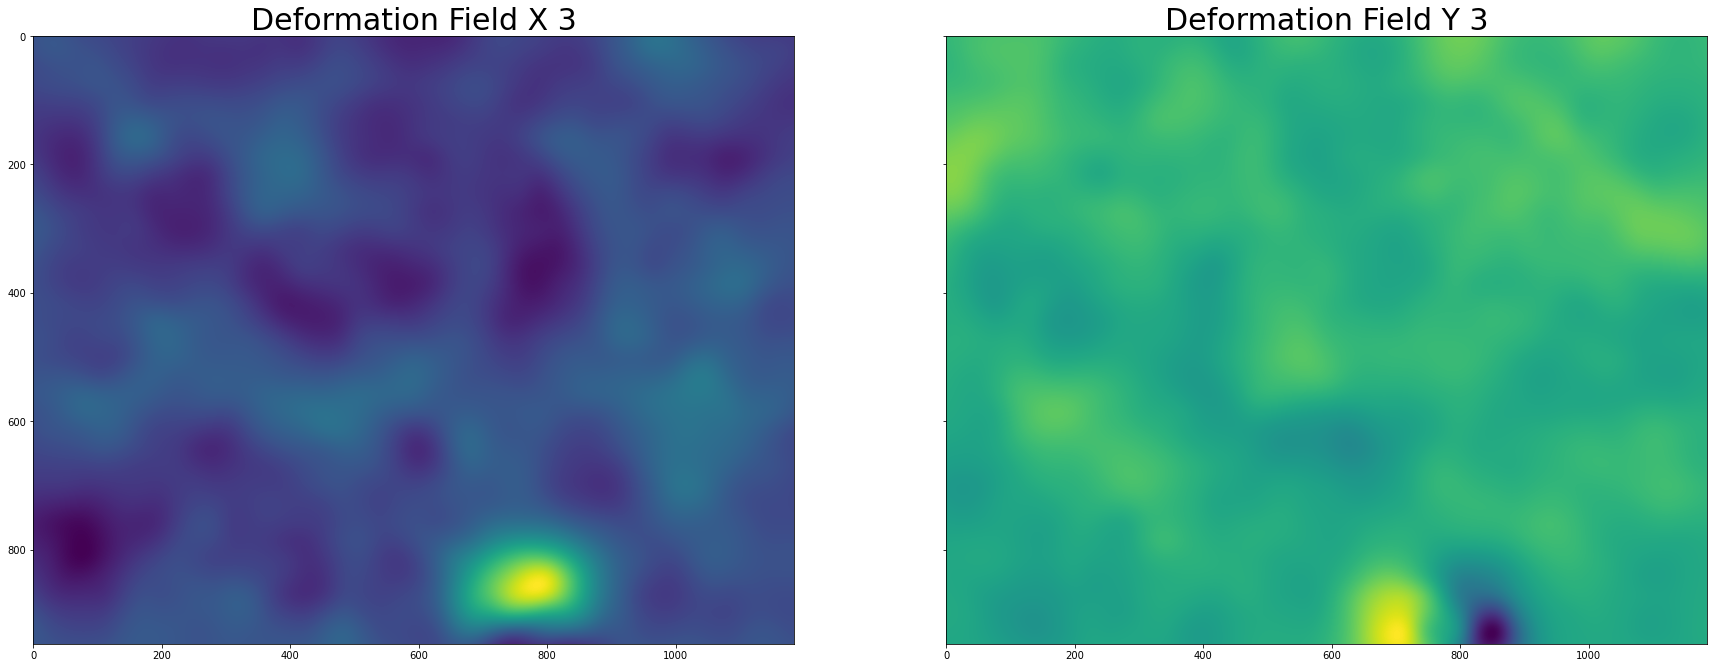

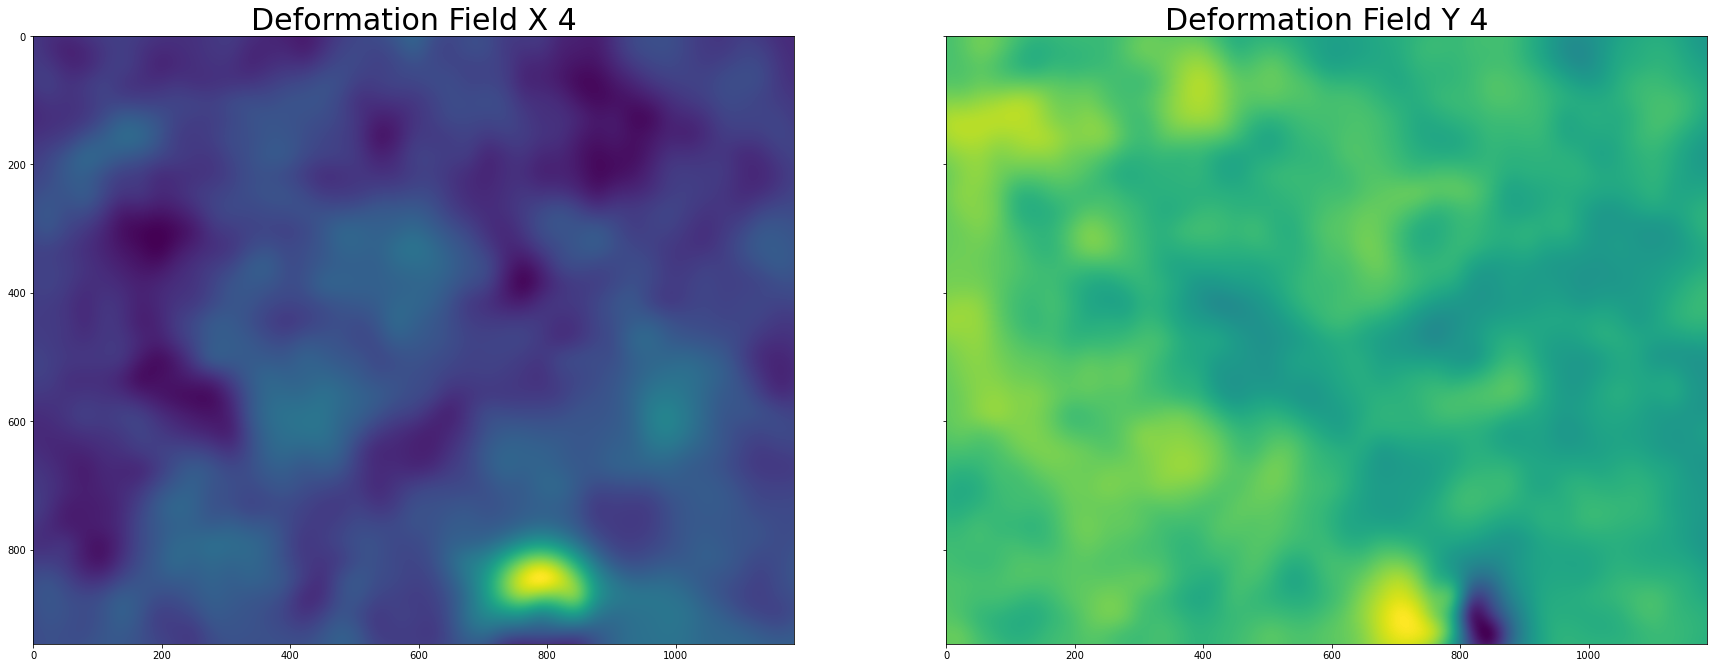

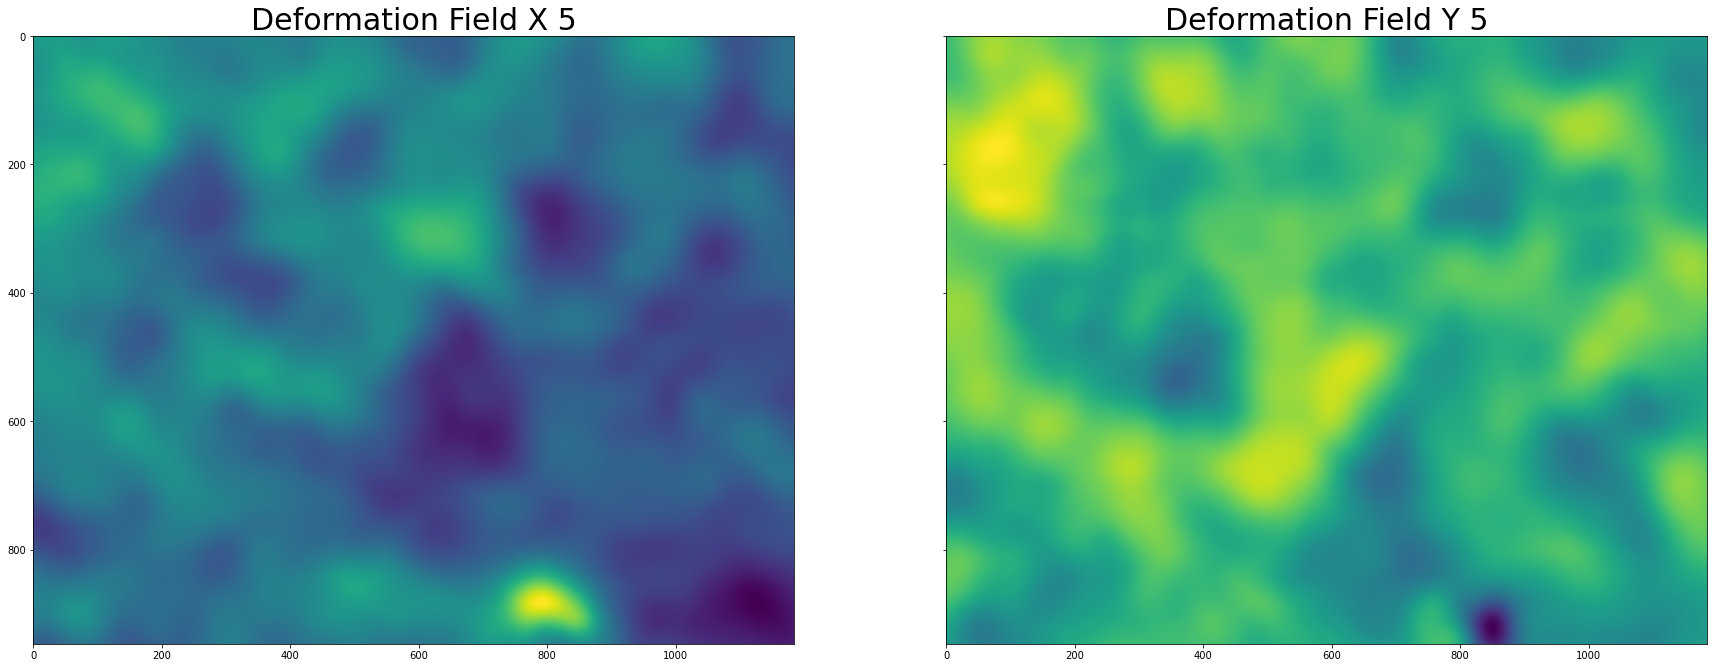

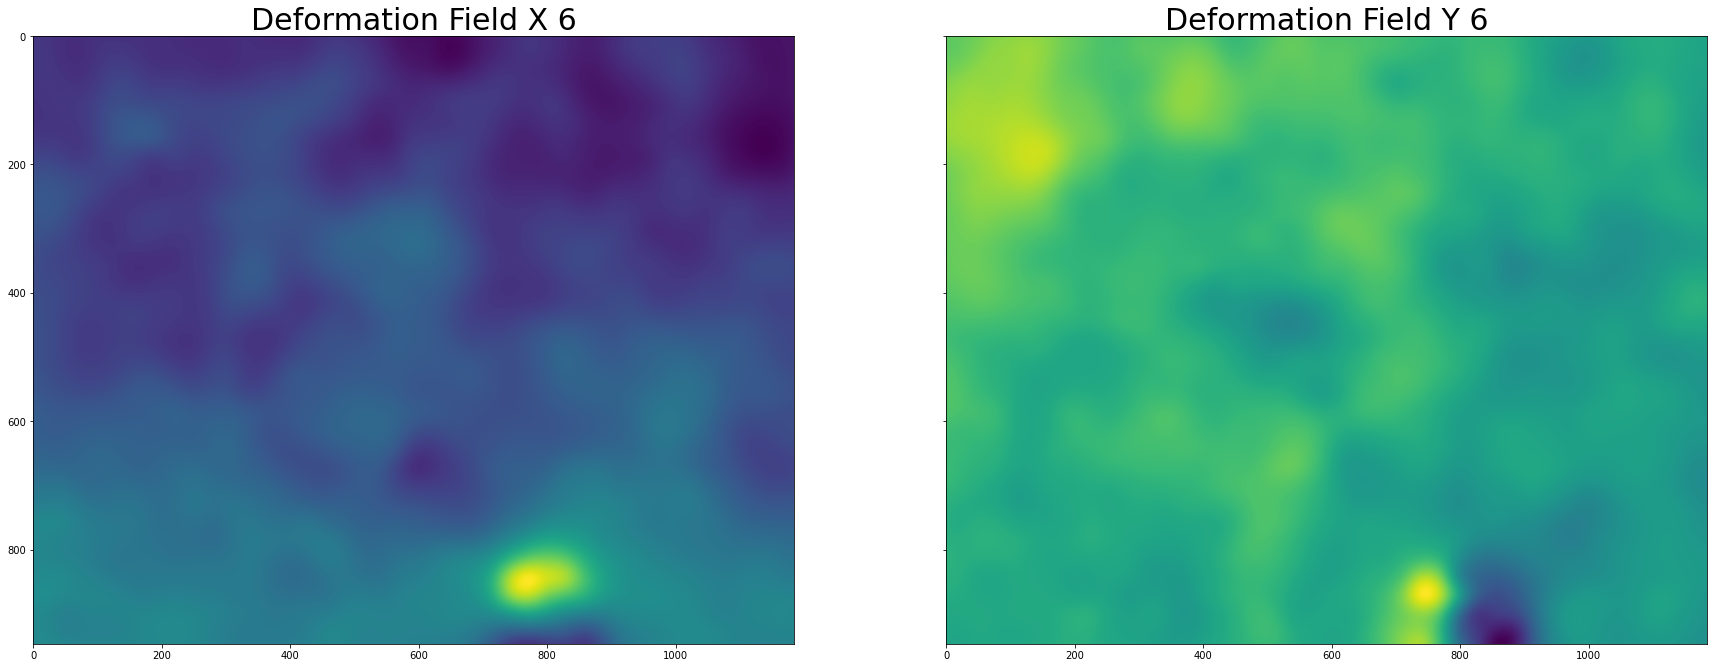

In [7]:
count = 0
for i in beads:
    #calculating the registration of the reference and beadsi
    result_transform_parameters = itk.elastix_registration_method(reference, i)

    #calculating the deformation field from the transform parameters
    deformation_field = itk.transformix_deformation_field(reference, result_transform_parameters)

    #plotting the u and v vectors
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=[30,30])
    plt.figsize=[100,100]
    axs[0].imshow(deformation_field[:,:,1])
    axs[0].set_title(f'Deformation Field X {count}', fontsize=30)
    axs[1].imshow(deformation_field[:,:,0])
    axs[1].set_title(f'Deformation Field Y {count}', fontsize=30)
    count += 1


I didn't really understand the second task, how do you use Fourier Transformation on an array of vectors? Also I do not know how to interpret the results from the Elastix method.